<a href="https://colab.research.google.com/github/Turtle-Grace/gracehuangtw/blob/main/Correlation_test_ESA_%26_DESTASIS_23132_0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ace_tools # Install the ace_tools package

import pandas as pd

# Load both Excel files
esa = "/content/Percentages_ESA.xlsx"
prevention = "/content/%_prevention care 23132-0002.xlsx"

# Display all sheet names to understand the structure
esa_sheets = pd.ExcelFile(esa).sheet_names
prevention_sheets = pd.ExcelFile(prevention).sheet_names

esa_sheets, prevention_sheets


(['Male', 'Female'],
 ['F32 Male', 'F33 Male', 'F32 Female', 'F33 Female', 'F32 All', 'F33 All'])

In [ ]:
# Load relevant sheets from both files
years_of_interest = [2003, 2006, 2009, 2012, 2015, 2018, 2021]

# Load ESA data
esa_male = pd.read_excel(esa, sheet_name='Male')
esa_female = pd.read_excel(esa, sheet_name='Female')

# Load Prevention care data
f32_male = pd.read_excel(prevention, sheet_name='F32 Male')
f33_male = pd.read_excel(prevention, sheet_name='F33 Male')
f32_female = pd.read_excel(prevention, sheet_name='F32 Female')
f33_female = pd.read_excel(prevention, sheet_name='F33 Female')

# Display a preview of each to understand the structure
{
    "ESA Male": esa_male.head(),
    "ESA Female": esa_female.head(),
    "F32 Male": f32_male.head(),
    "F33 Male": f33_male.head(),
    "F32 Female": f32_female.head(),
    "F33 Female": f33_female.head()
}


{'ESA Male':    Year Gender 18 - 19 20 - 24 25 - 29 30 - 34 35 - 39 40 - 44 45 - 49  \
 0  2000   Male   3.26%   9.93%  11.72%  13.56%  16.24%  12.73%  11.51%   
 1  2003   Male   1.99%  10.31%  10.04%  12.30%  15.65%  15.26%  13.07%   
 2  2006   Male   2.09%   9.46%   9.18%   8.94%  12.64%  14.13%  12.79%   
 3  2009   Male   3.61%   9.52%   9.64%   9.08%  10.37%  12.68%  14.63%   
 4  2012   Male   3.29%   9.31%   9.77%   9.72%   8.96%  11.00%  14.69%   
 
   50 - 54 55 - 59 60 - 64  
 0   9.86%   9.89%   1.31%  
 1  11.86%   8.89%   0.64%  
 2  11.73%  10.60%   8.44%  
 3  11.30%  10.92%   8.25%  
 4  12.53%  11.08%   9.64%  ,
 'ESA Female':    Year   Gender 18 - 19 20 - 24 25 - 29 30 - 34 35 - 39 40 - 44 45 - 49  \
 0  2000   Female   3.04%  10.06%  11.55%  13.88%  15.26%  12.96%  11.47%   
 1  2003   Female   1.95%  10.29%  10.04%  12.15%  15.30%  15.07%  13.11%   
 2  2006   Female   1.70%   9.18%  10.02%   9.98%  12.72%  14.49%  13.17%   
 3  2009   Female   3.49%   9.37%   9.5

##Below shows all age groups

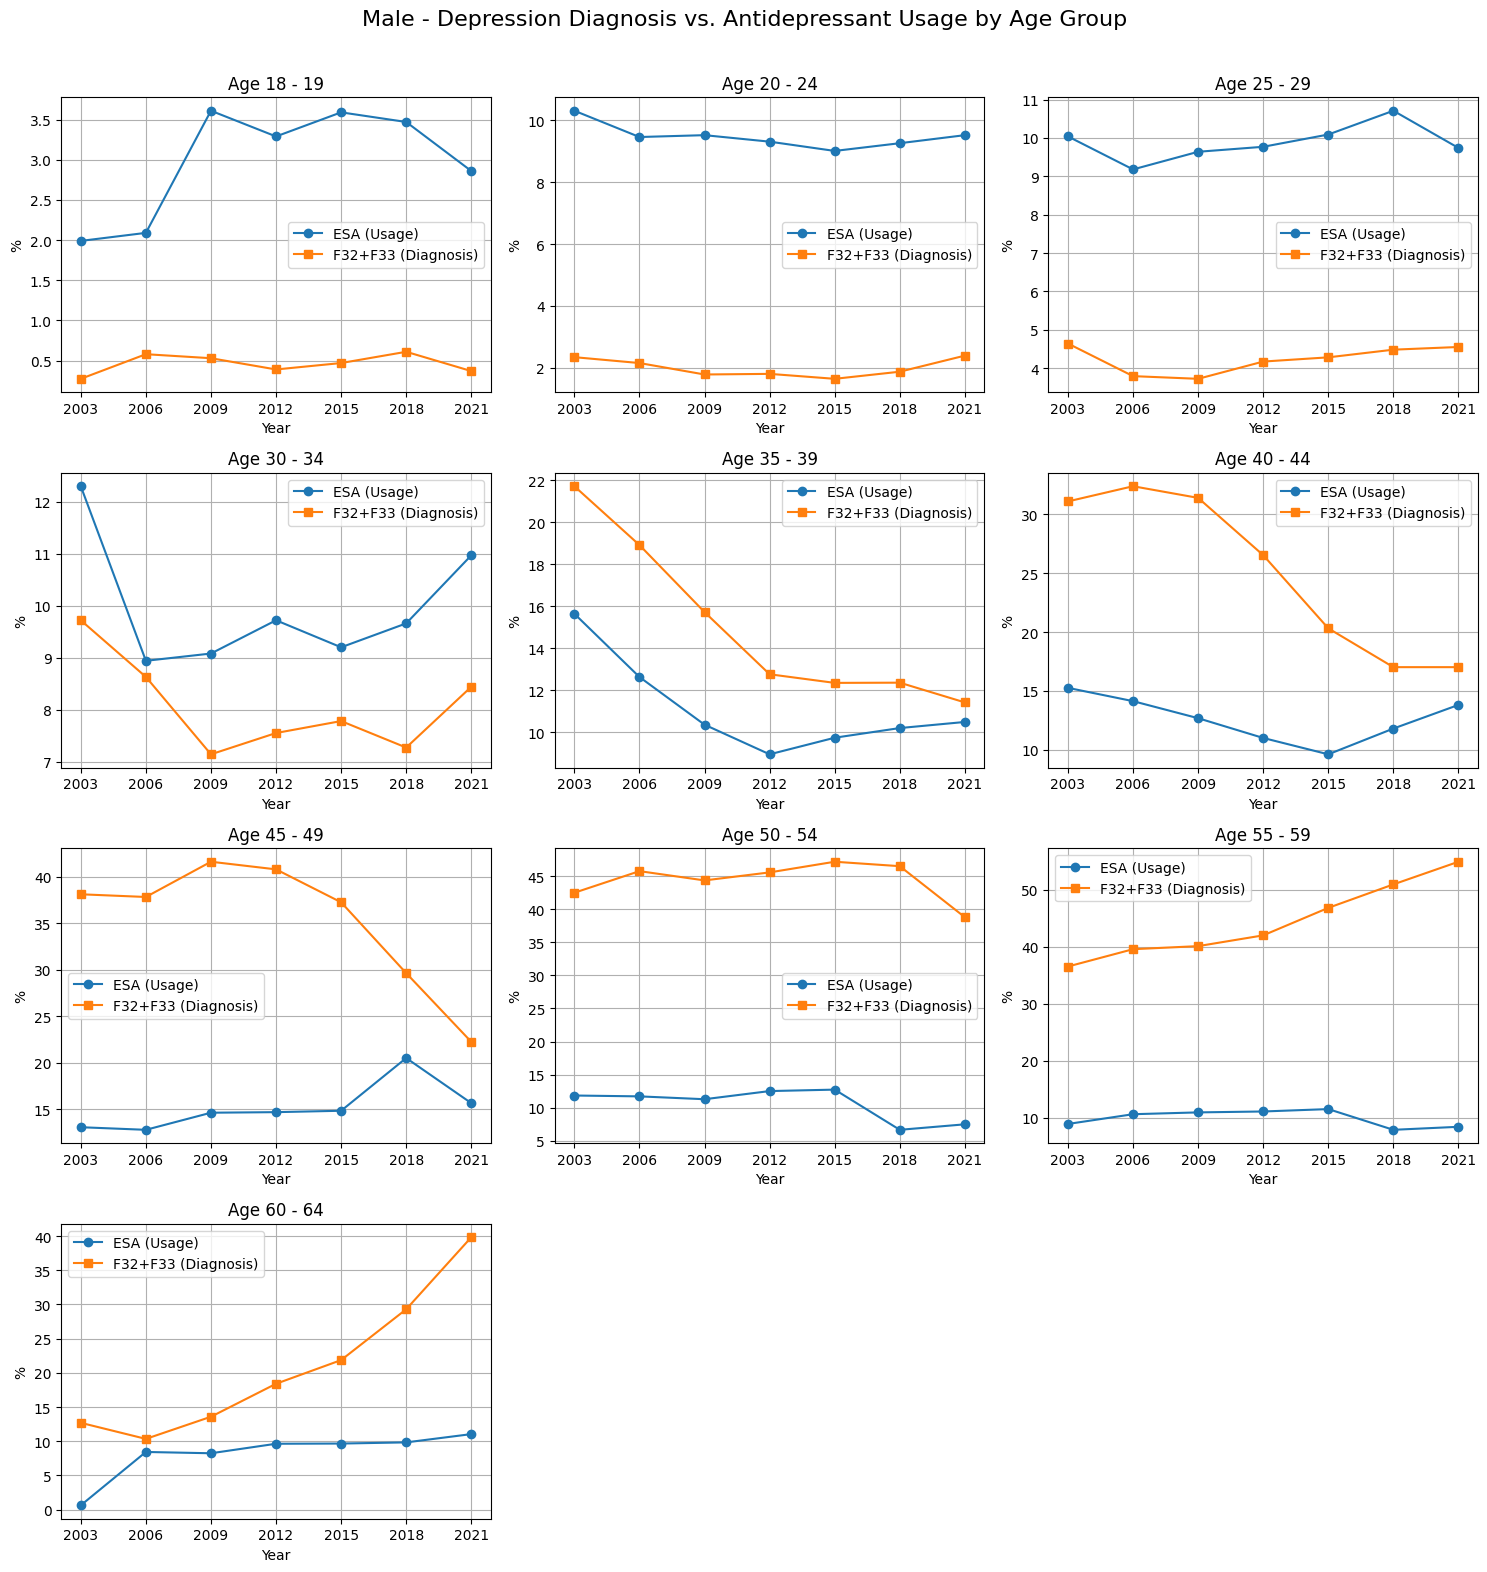

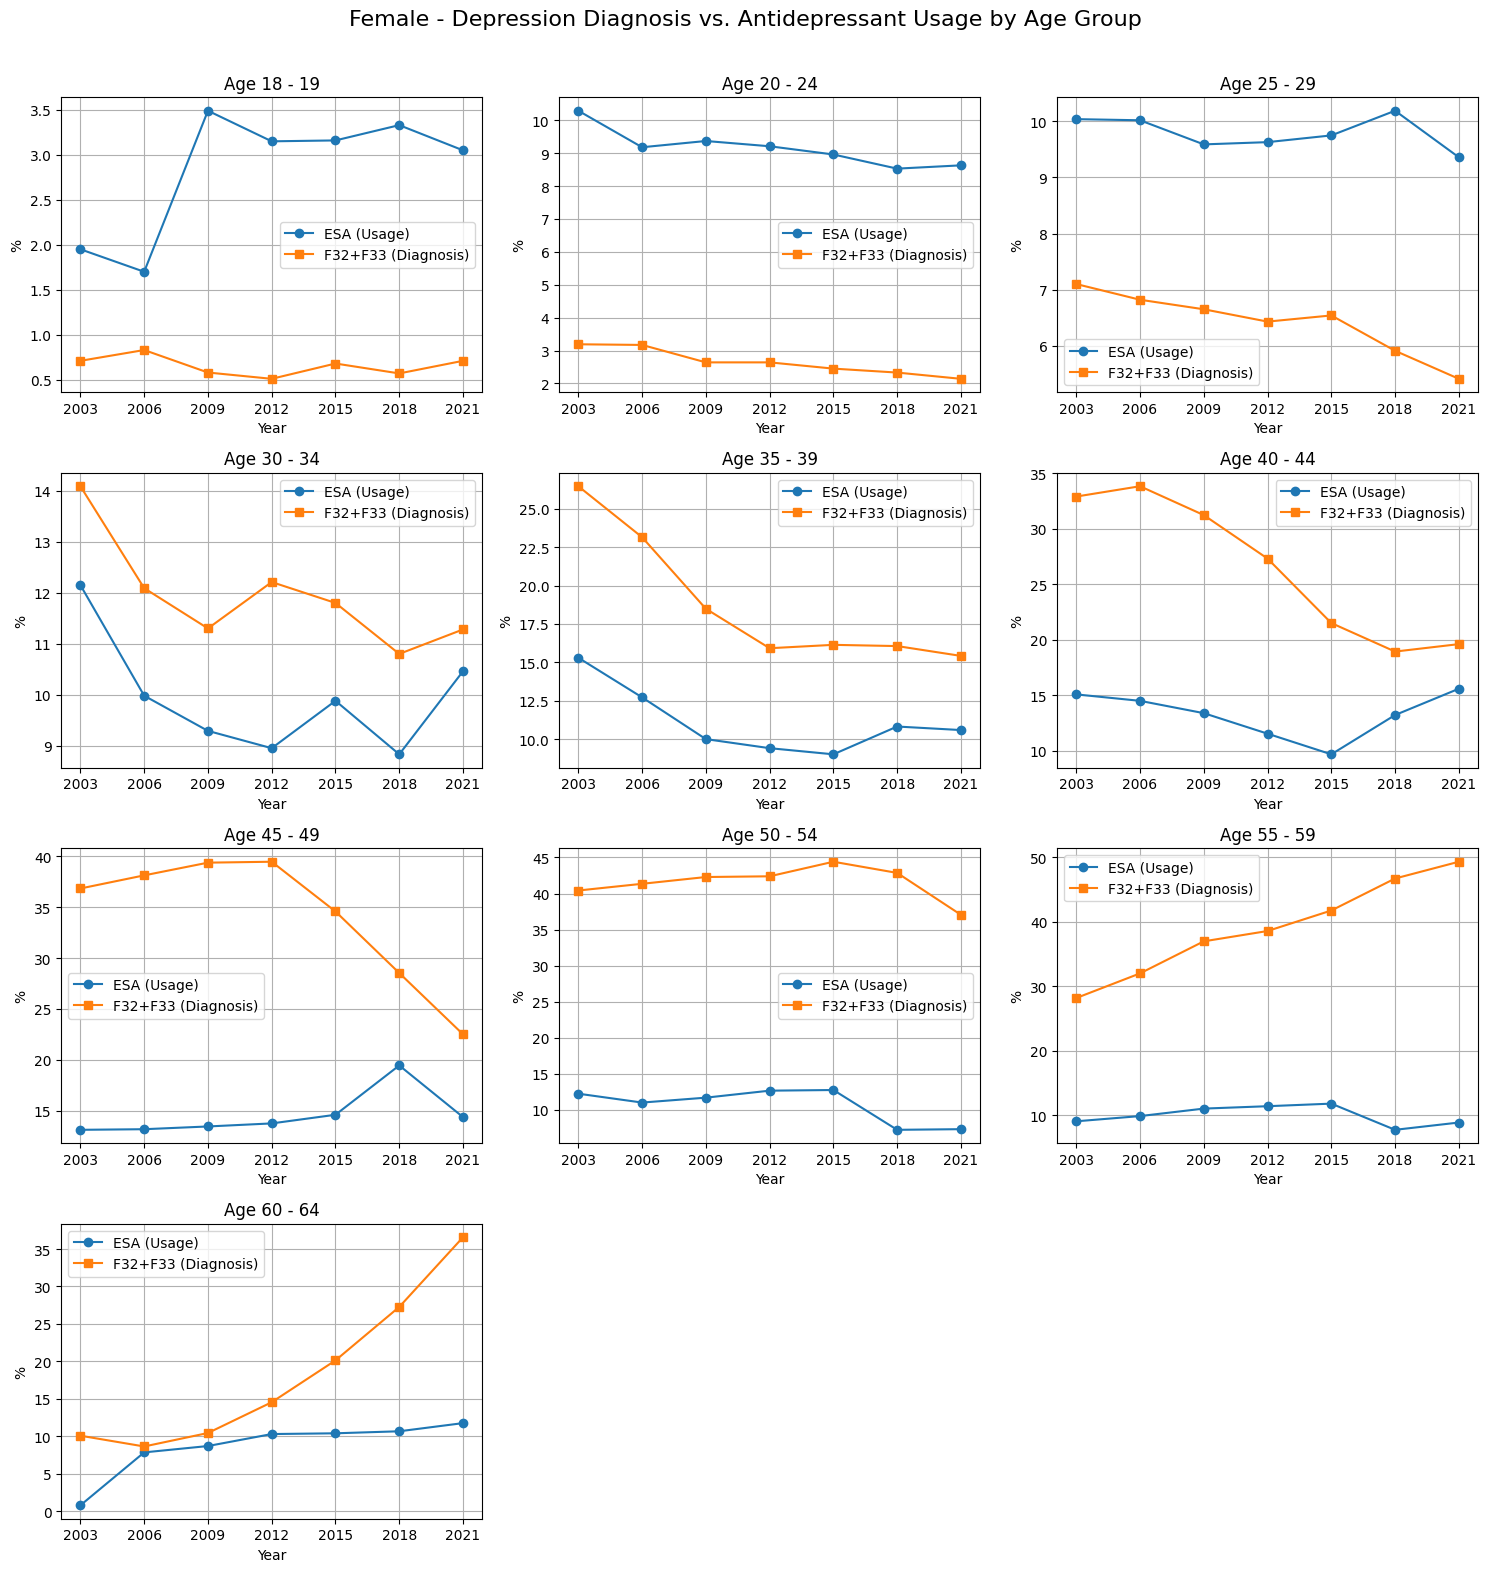

In [ ]:
import matplotlib.pyplot as plt

def plot_all_age_groups(esa_df, prevention_df, gender='Male'):
    age_groups = ['18 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39',
                  '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64']

    num_plots = len(age_groups)
    cols = 3
    rows = (num_plots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
    axes = axes.flatten()

    for i, age in enumerate(age_groups):
        axes[i].plot(esa_df['Year'], esa_df[age], marker='o', label='ESA (Usage)')
        axes[i].plot(prevention_df['Year'], prevention_df[age], marker='s', label='F32+F33 (Diagnosis)')
        axes[i].set_title(f'Age {age}')
        axes[i].set_xticks(esa_df['Year'])  # prevent decimal years
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('%')
        axes[i].grid(True)
        axes[i].legend()

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'{gender} - Depression Diagnosis vs. Antidepressant Usage by Age Group', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Example usage:
plot_all_age_groups(esa_male_clean, prevention_male_combined, gender='Male')
plot_all_age_groups(esa_female_clean, prevention_female_combined, gender='Female')

In [ ]:
# Helper function to clean and prepare data

def standardize_columns(df):
    df.columns = df.columns.str.strip().str.replace('\n', '', regex=True).str.replace('–', '-', regex=False)
    return df

esa_male = standardize_columns(esa_male)
esa_female = standardize_columns(esa_female)
f32_male = standardize_columns(f32_male)
f33_male = standardize_columns(f33_male)
f32_female = standardize_columns(f32_female)
f33_female = standardize_columns(f33_female)


def clean_and_filter(df, year_col, years, value_cols):
    if df.columns[0] != "Year":
        df = df.rename(columns={df.columns[0]: "Year"})
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
    df = df[df["Year"].isin(years)]

    for col in value_cols:
        if col in df.columns:  # only convert columns that exist
            df[col] = df[col].replace("%", "", regex=True).replace(",", ".", regex=True).astype(float)
    return df
    #only converting numeric age columns and not touching 'Gender', 'Code', etc.
# Get age group columns from ESA data (assuming both genders have same structure)
age_groups = ['18 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39',
              '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64']


# Clean ESA data
esa_male_clean = clean_and_filter(esa_male, "Year", years_of_interest, age_groups)
esa_female_clean = clean_and_filter(esa_female, "Year", years_of_interest, age_groups)

# Clean prevention care data
f32_male_clean = clean_and_filter(f32_male, "Year", years_of_interest, age_groups)
f33_male_clean = clean_and_filter(f33_male, "Year", years_of_interest, age_groups)
f32_female_clean = clean_and_filter(f32_female, "Year", years_of_interest, age_groups)
f33_female_clean = clean_and_filter(f33_female, "Year", years_of_interest, age_groups)


# Combine F32 and F33 values (element-wise addition)
# F32 + F33 = All patients diagnosed with depression (whether first-time or recurrent)
prevention_male_combined = f32_male_clean.copy()
prevention_male_combined[age_groups] = f32_male_clean[age_groups] + f33_male_clean[age_groups]

prevention_female_combined = f32_female_clean.copy()
prevention_female_combined[age_groups] = f32_female_clean[age_groups] + f33_female_clean[age_groups]



from IPython.display import display

print("ESA Male Cleaned")
display(esa_male_clean)

print("Prevention Male Combined")
display(prevention_male_combined)


ESA Male Cleaned


<ipython-input-27-531e6bbb98a3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace("%", "", regex=True).replace(",", ".", regex=True).astype(float)
<ipython-input-27-531e6bbb98a3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace("%", "", regex=True).replace(",", ".", regex=True).astype(float)
<ipython-input-27-531e6bbb98a3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Year,Gender,18 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64
1,2003,Male,1.99,10.31,10.04,12.30,15.65,15.26,13.07,11.86,8.89,0.64
2,2006,Male,2.09,9.46,9.18,8.94,12.64,14.13,12.79,11.73,10.60,8.44
3,2009,Male,3.61,9.52,9.64,9.08,10.37,12.68,14.63,11.30,10.92,8.25
4,2012,Male,3.29,9.31,9.77,9.72,8.96,11.00,14.69,12.53,11.08,9.64
5,2015,Male,3.59,9.01,10.09,9.20,9.75,9.61,14.84,12.75,11.50,9.67
6,2018,Male,3.47,9.26,10.71,9.66,10.21,11.80,20.51,6.68,7.86,9.84
7,2021,Male,2.86,9.52,9.74,10.97,10.50,13.81,15.66,7.51,8.39,11.05


Prevention Male Combined


,Year,Code,Main diagnosis,Gender,18 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64
0,2003,ICD10-F32,Depressive episode,Male,0.2736,2.34,4.64,9.72,21.72,31.11,38.12,42.48,36.54,12.70
3,2006,ICD10-F32,Depressive episode,Male,0.5800,2.15,3.79,8.63,18.92,32.40,37.83,45.74,39.58,10.35
6,2009,ICD10-F32,Depressive episode,Male,0.5300,1.78,3.72,7.14,15.73,31.41,41.62,44.34,40.12,13.59
9,2012,ICD10-F32,Depressive episode,Male,0.3900,1.80,4.17,7.55,12.77,26.54,40.80,45.55,42.01,18.41
12,2015,ICD10-F32,Depressive episode,Male,0.4700,1.64,4.28,7.78,12.36,20.32,37.26,47.16,46.84,21.87
15,2018,ICD10-F32,Depressive episode,Male,0.6100,1.87,4.48,7.27,12.37,17.02,29.64,46.49,50.96,29.30
18,2021,ICD10-F32,Depressive episode,Male,0.3700,2.39,4.55,8.44,11.43,17.02,22.25,38.78,54.94,39.83


e.g. 2006, among males aged 30–34:

F32 (Depressive episode) = 3.1%
F33 (Recurrent depressive disorder) = 5.4%
- Then the total percentage of depressed males in that group = 3.1% + 5.4% = 8.5%

Note: matplotlib automatically spaces ticks evenly — but doesn't round them unless told to.
So, get decimals (like 2002.5, 2007.5) even though the data only has full years like 2003, 2006, etc.

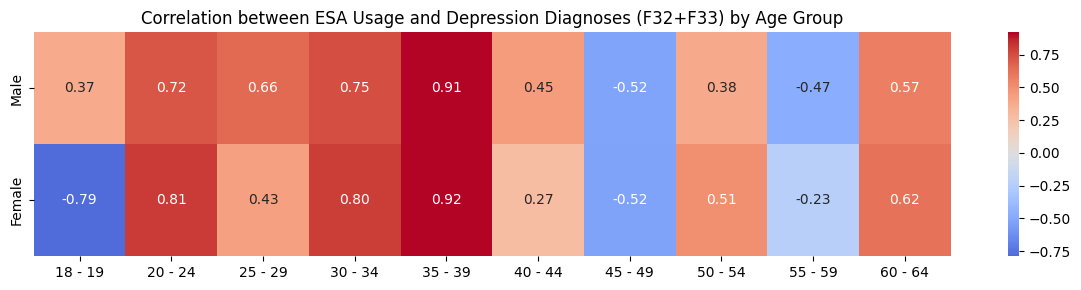

In [ ]:
# Compute correlation
import numpy as np # Import numpy and alias it as np

def compute_correlations(esa_df, prevention_df):
    correlations = {}
    for age in age_groups:
        corr = np.corrcoef(esa_df[age], prevention_df[age])[0, 1]
        correlations[age] = corr
    return correlations

male_corrs = compute_correlations(esa_male_clean, prevention_male_combined)
female_corrs = compute_correlations(esa_female_clean, prevention_female_combined)
corr_df = pd.DataFrame([male_corrs, female_corrs], index=["Male", "Female"])

# Plot heatmap
import seaborn as sns # Import seaborn for heatmap visualization
import matplotlib.pyplot as plt # Import matplotlib for plotting

plt.figure(figsize=(12, 3))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation between ESA Usage and Depression Diagnoses (F32+F33) by Age Group")
plt.tight_layout()
plt.show()

ESA (people who used antidepressants in the past 12 months), and
F32 + F33 (people diagnosed with depression in rehab/prevention care facilities),
###Compute the correlation between them to measure how strongly they move together over time.
---
For Example,
age group 30–34 (males):

* ESA usage went from 8% → 9% → 10%

* Diagnosis (F32+F33) went from 6% → 7% → 9%

These trends are moving in the same direction →  a positive correlation, e.g., +0.95.


---

If the correlation between ESA and F32+F33 is high (close to +1):



It suggests that antidepressant usage reflects actual diagnosed depression rates, which makes sense if treatment is aligned with diagnosis.
If the correlation is low or negative:

It might suggest over-prescription, under-diagnosis, or that many antidepressant users are treated outside preventive/rehab facilities (e.g., by GPs or psychiatrists).

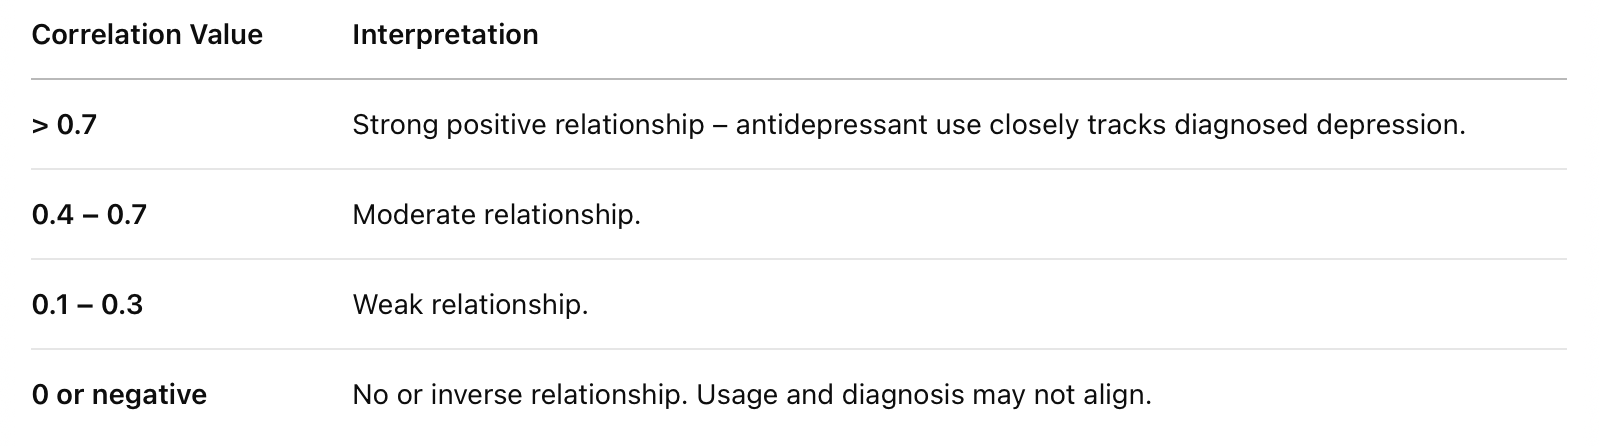

Strong positive correlations in:
* Males 35–39 (0.91), Females 35–39 (0.92)

* Females 20–24 (0.81), 30–34 (0.80)

Suggests that ESA usage accurately reflects clinical diagnoses in these groups.

Negative correlations in:
* Females 18–19 (–0.79)
* Males and Females 45–49, 55–59

Could indicate:
1. Over-prescription without formal rehab diagnosis
2. Diagnoses occurring in other settings (e.g., outpatient or primary care)
3. Underreporting in facilities

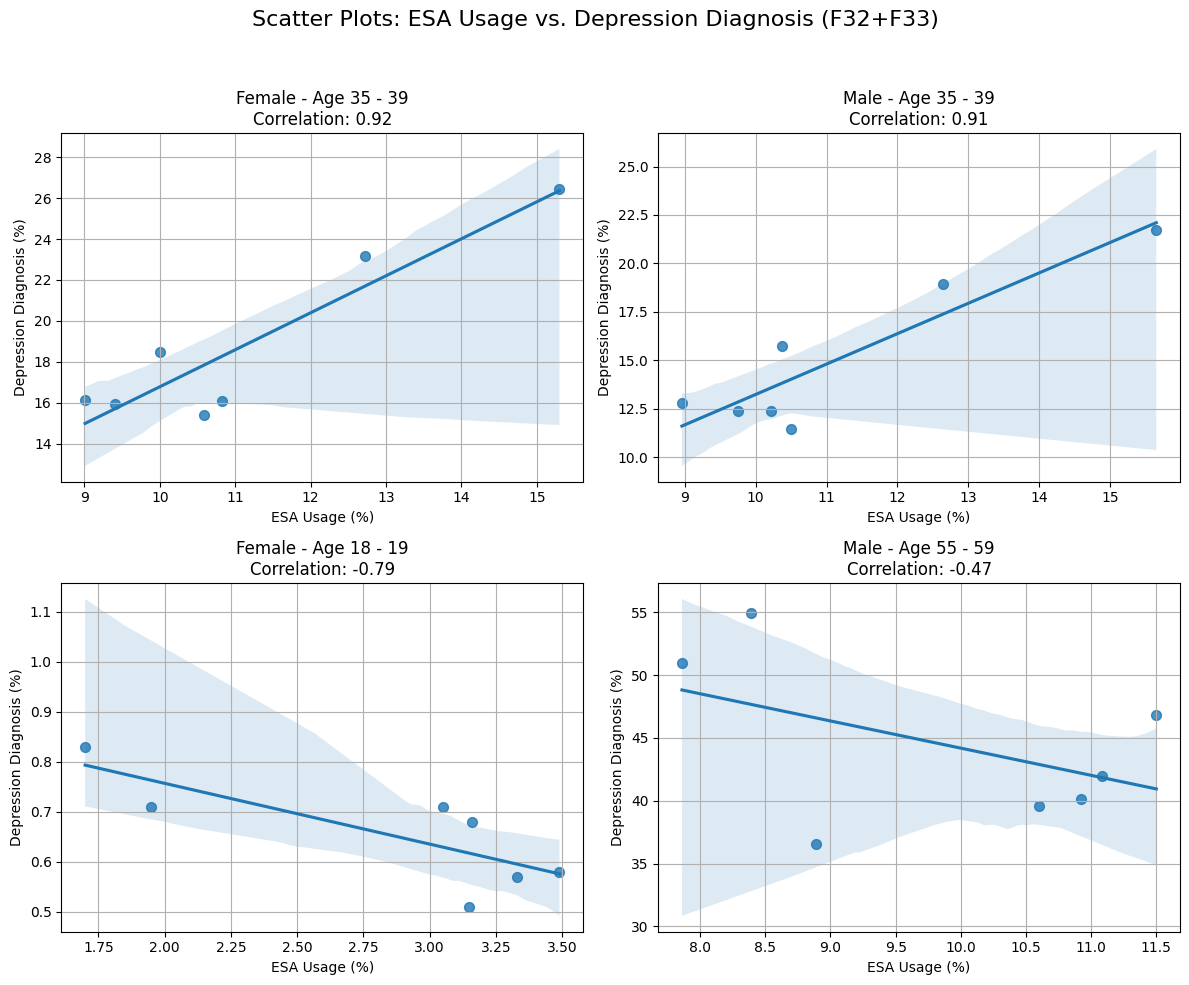

In [ ]:
# Generate scatter plots with regression line for a few selected age groups
# High correlation: Female 35–39, Male 35–39
# Low/negative correlation: Female 18–19, Male 55–59

selected_age_groups = [
    ("Female", "35 - 39", esa_female_clean, prevention_female_combined),
    ("Male", "35 - 39", esa_male_clean, prevention_male_combined),
    ("Female", "18 - 19", esa_female_clean, prevention_female_combined),
    ("Male", "55 - 59", esa_male_clean, prevention_male_combined)
]

# Set up plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (gender, age, esa_df, prevention_df) in enumerate(selected_age_groups):
    ax = axes[i]
    x = esa_df[age]
    y = prevention_df[age]
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={"s": 50})
    corr = np.corrcoef(x, y)[0, 1]
    ax.set_title(f"{gender} - Age {age}\nCorrelation: {corr:.2f}")
    ax.set_xlabel("ESA Usage (%)")
    ax.set_ylabel("Depression Diagnosis (%)")
    ax.grid(True)

plt.suptitle("Scatter Plots: ESA Usage vs. Depression Diagnosis (F32+F33)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:


import statsmodels.api as sm

# Function to run and summarize linear regression for a given age group and gender
def run_regression(esa_df, prevention_df, age_group, gender):
    esa_df = esa_df.reset_index(drop=True)
    prevention_df = prevention_df.reset_index(drop=True)
    x = esa_df[age_group]
    y = prevention_df[age_group]
    X = sm.add_constant(x)  # adds intercept term
    model = sm.OLS(y, X).fit()
    return model.summary()

# Run regressions for the same four age/gender combinations
regression_results = {
    "Female 35-39": run_regression(esa_female_clean, prevention_female_combined, "35 - 39", "Female"),
    "Male 35-39": run_regression(esa_male_clean, prevention_male_combined, "35 - 39", "Male"),
    "Female 18-19": run_regression(esa_female_clean, prevention_female_combined, "18 - 19", "Female"),
    "Male 55-59": run_regression(esa_male_clean, prevention_male_combined, "55 - 59", "Male")
}

regression_results

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


{'Female 35-39': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                35 - 39   R-squared:                       0.847
 Model:                            OLS   Adj. R-squared:                  0.816
 Method:                 Least Squares   F-statistic:                     27.70
 Date:                Thu, 10 Apr 2025   Prob (F-statistic):            0.00329
 Time:                        21:09:59   Log-Likelihood:                -13.069
 No. Observations:                   7   AIC:                             30.14
 Df Residuals:                       5   BIC:                             30.03
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------

###Strong positive and significant relationship.
1. Female, Age 35–39
* R² = 0.85 → 85% of variation in depression diagnoses explained by ESA usage
* Slope = 1.81 → Each 1% increase in ESA usage is associated with a 1.81% increase in diagnosis
* p = 0.003 → Statistically significant
2. Male, Age 35–39
* R² = 0.83
* Slope = 1.57
* p = 0.004

### Usage and diagnosis move in opposite directions.
3. Female, Age 18–19
* R² = 0.62
* Slope = –0.12 → Negative: As ESA use increases, diagnosis rate decreases
* p = 0.035 → Still statistically significant

4. Male, Age 55–59
* R² = 0.23
* Slope = –2.16
* p = 0.282 → Not statistically significant